# Simulation

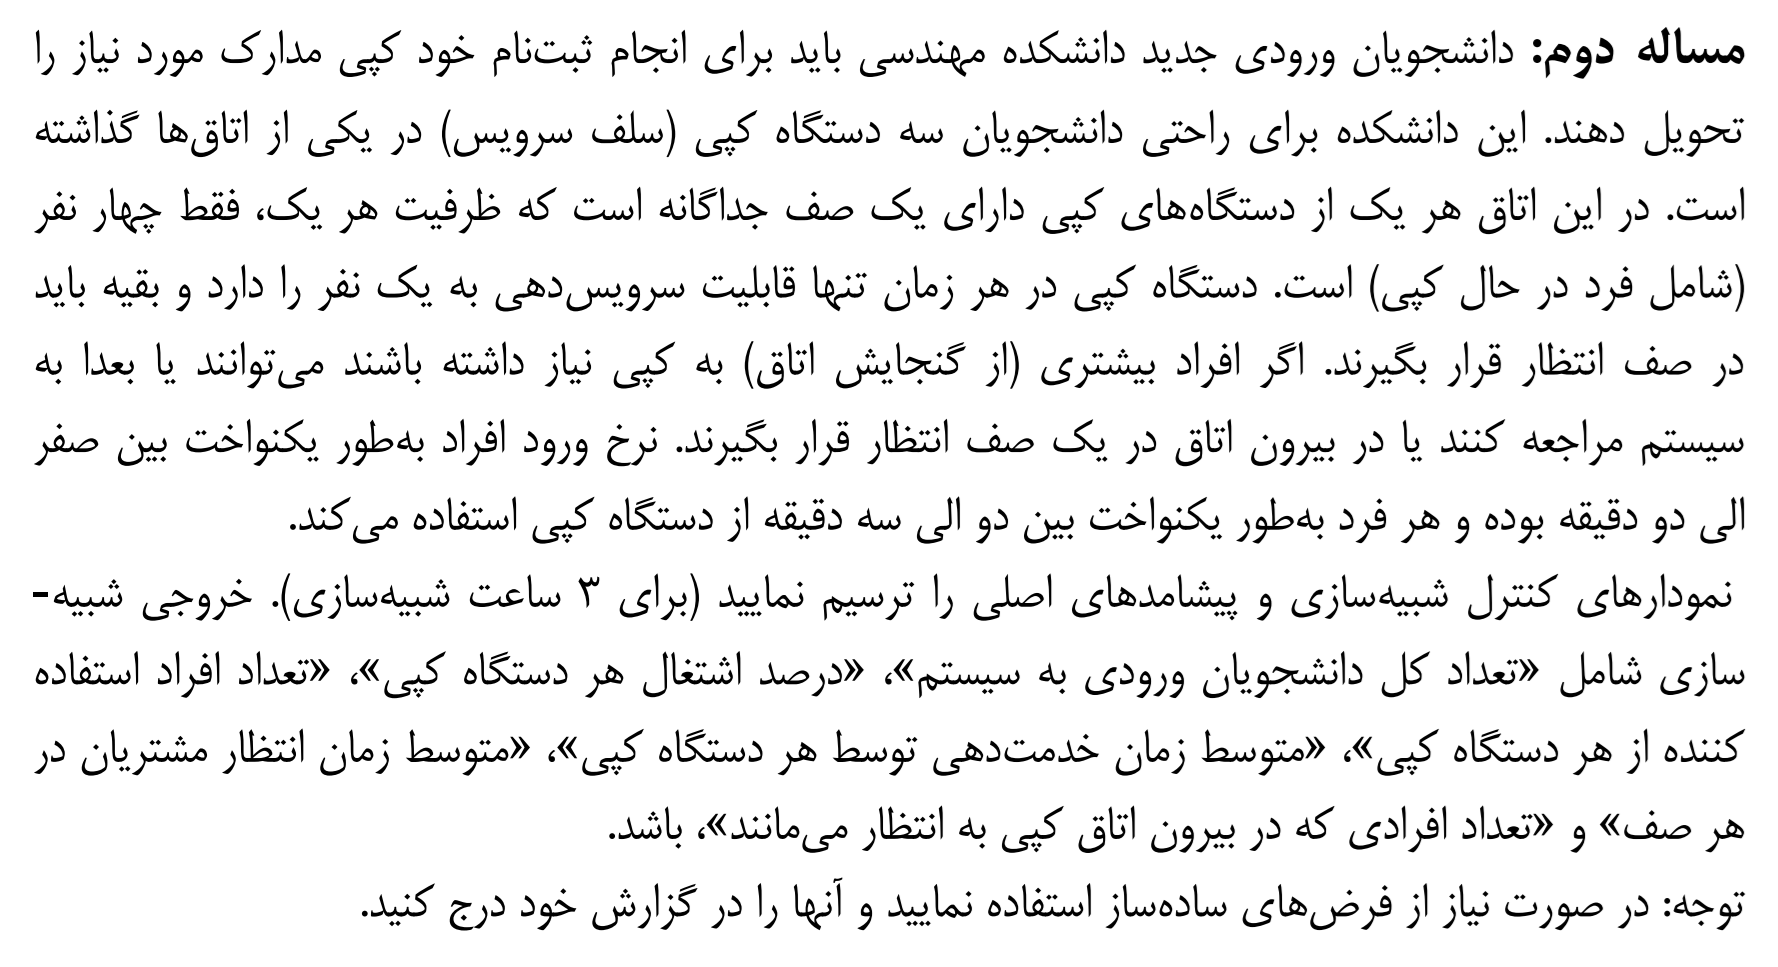

In [1]:
from IPython.display import Image, display
display(Image(filename="C:/Users/USER/Desktop/copyy.png"))

In [4]:
from random import randint
import numpy as np
import numpy as np
import pandas as pd

class Srv_Simulation:
    def __init__(self):
        self.fel=[[0,0]] # فرض ساده ساز ورود در زمان صفر است 
        self.fel_total=[[0,0]] #لیستی که لیست پیشامدها را بدون حذف کردن نگهداری می کند
        self.T = 3*60 #زمان کل شبیه سازی
        self.Tnow = 0.0 #ساعت شبیه سازی
        self.list_Tnow=[] #لیستی که زمان های فعلی را هر بار نگهداری می کند
        self.last_event_time=0 # زمان قبلی tnow است
        self.Stot = 0 #تعداد کل مشتریان

        self.SVR1 = 0 # زمان خدمت دهی دستگاه اول 
        self.SVR2 = 0 # زمان خدمت دهی دستگاه دوم 
        self.SVR3 = 0 # زمان خدمت دهی دستگاه سوم 
        
        self.list_SVR1=[] # زمان های تجمعی خدمتدهی را در لیستی نگهداری می کند 
        self.list_SVR2=[]
        self.list_SVR3=[]

        self.s1 = 0 # وضعیت فعلی سرویس دستگاه اول  
        #0 or 1
        self.s2 = 0 # وضعیت فعلی سرویس دستگاه دوم  
        #0 or 1
        self.s3 = 0 # وضعیت فعلی سرویس دستگاه سوم  
        #0 or 1
        
        self.list_code=[]  #لیست کدهای اجرایی را ذخیره می کند
        self.N1 = 0 #تعداد افرادی که از دستگاه اول خدمت دریافت کردند  
        self.N2 = 0 #تعداد افرادی که از دستگاه دوم خدمت دریافت کردند  
        self.N3 = 0 #تعداد افرادی که از دستگاه اول خدمت دریافت کردند  

        self.Q0 = 0 #تعداد افراد منتظر در صف بیرون از اتاق
        self.Q1=0 #تعداد افراد منتظر در صف پشت دستگاه اول
        self.Q2=0 #تعداد افراد منتظر در صف پشت دستگاه دوم
        self.Q3=0 #تعداد افراد منتظر در صف پشت دستگاه سوم
        
        self.NQ0 = 0
        
        self.Twt1 = 0.0  #  ذخیره زمان انتظار پشت دستگاه اول
        self.Twt2 = 0.0  #  ذخیره زمان انتظار پشت دستگاه دوم
        self.Twt3 = 0.0  #  ذخیره زمان انتظار پشت دستگاه سوم
        self.Twt0 = 0.0  #  ذخیره زمان انتظار بیرون از اتاق

    def next_event(self):
        self.fel.sort(key=lambda x: x[1]) #سورت کردن لیست پیشامدها
        type_event=self.fel[0][0] #ذخیره نوع پیشامد
        self.list_code.append(type_event) 
        self.Tnow=self.fel[0][1]#جلو بردن ساعت شبیه سازی
        self.list_Tnow.append(self.Tnow)

        del self.fel[0] # بیرون کشیدن پیشامد اجرا شده از لیست پیشامد
        if type_event==0:# ورود:0
            self.arrival()
        elif type_event==1:#اتمام خدمتدهی دستگاه اول:1
            self.Server1()
        elif type_event==2: #اتمام خدمتدهی دستگاه دوم:2
            self.Server2()
        elif type_event==3: #اتمام خدمتدهی دستگاه سوم:3
            self.Server3()

    def arrival(self): 
        self.Stot += 1 # افزایش مشتریان ورودی
        self.at= self.generate_time_interarrival()
        self.fel.append([0, self.Tnow + self.at]) #برنامه ریزی برای ورود بعدی
        self.fel_total.append([0, self.Tnow + self.at])

        if self.s1 == 0 or self.s2 == 0 or self.s3 == 0 :  # اگر سرور بیکاری وجود داشته باشد
            if self.s1 == 0 :
                self.s1 = 1 
                self.ST1 = self.generate_service_time()  #Able مدت زمان خدمت دهی برای سرور 
                self.SVR1 += self.ST1 #افزایش زمان خدمتدهی تجمعی
                self.list_SVR1.append(self.SVR1)

                self.fel.append([1, self.Tnow + self.ST1])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([1, self.Tnow + self.ST1])
                     
            elif  self.s2 == 0: #بیکار باشد دوم اگر سرور  
                self.s2 = 1 
                self.ST2 = self.generate_service_time()  #Able مدت زمان خدمت دهی برای سرور 
                self.SVR2 += self.ST2 #افزایش زمان خدمتدهی تجمعی
                self.list_SVR2.append(self.SVR2)

                self.fel.append([2, self.Tnow + self.ST1])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([2, self.Tnow + self.ST2])
                    
            elif self.s3 == 0: # اگر سرور سوم بیکار باشد
                self.s3 = 1  
                self.ST3 = self.generate_service_time() #مدت زمان خدمت دهی برای Baker سرور 
                self.SVR3 += self.ST3 #افزایش زمان خدمتدهی تجمعی
                self.list_SVR3.append(self.SVR3)

                self.fel.append([3, self.Tnow + self.ST3])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([3, self.Tnow + self.ST3])
                 
        else : #یعنی هردو سرور مشغول هستند
            if self.Q1<=3 :
                self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Q1=self.Q1+1
                self.last_event_time = self.Tnow

            elif self.Q2<=3 :
                self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Q2=self.Q2+1
                self.last_event_time = self.Tnow
                
            elif self.Q3<=3:
                self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Q3=self.Q3+1
                self.last_event_time = self.Tnow

            else: #صف های هر سه ماشین 4 هستند و صف های درون اتاق ظرفیت ندارد
                self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Q0=self.Q0+1
                self.NQ0=self.NQ0+1
                self.last_event_time = self.Tnow

        
    def Server1(self): #اتمام خدمت دهی دستگاه اول 
        self.N1 += 1 
        if self.Q0 == 0: #اگر صرف بیرون اتاق نباشد
            if self.Q1!=0 :
                self.ST1 = self.generate_service_time()#تولید زمان خدمت دهی
                self.SVR1 += self.ST1 #افزایش زمان خدمتدهی تجمعی
                self.list_SVR1.append(self.SVR1)
            
                self.fel.append([1, self.Tnow + self.ST1])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([1, self.Tnow + self.ST1])
                self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.last_event_time = self.Tnow            
                self.Q1 -= 1 #یک نفر از صف کم می شود

            
            else :#صف نداریم
                self.s1 = 0  #خدمت تمام شده، وضعیت بیکار می شود
        else:
            self.ST1 = self.generate_service_time()#تولید زمان خدمت دهی
            self.SVR1 += self.ST1 #افزایش زمان خدمتدهی تجمعی
            self.list_SVR1.append(self.SVR1)
 
            self.fel.append([1, self.Tnow + self.ST1])#برنامه ریزی برای خروجی بعدی
            self.fel_total.append([1, self.Tnow + self.ST1])
            self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.last_event_time = self.Tnow            
            self.Q0 -= 1

    def Server2(self):#اتمام خدمت دهی دستگاه دوم 
        self.N2 += 1 
        if self.Q0 == 0: #اگر صرف بیرون اتاق نباشد
            if self.Q2!=0 :
                self.ST2 = self.generate_service_time()#تولید زمان خدمت دهی
                self.SVR2 += self.ST2 #افزایش زمان خدمتدهی تجمعی
                self.list_SVR2.append(self.SVR2)
            
                self.fel.append([2, self.Tnow + self.ST2])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([2, self.Tnow + self.ST2])
                self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.last_event_time = self.Tnow            
                self.Q2 -= 1 #یک نفر از صف کم می شود
        
            else : #صف نداریم
                self.s2 = 0   #خدمت تمام شده، وضعیت بیکار می شود
        else:
            self.ST2 = self.generate_service_time()#تولید زمان خدمت دهی
            self.SVR2 += self.ST2 #افزایش زمان خدمتدهی تجمعی
            self.list_SVR2.append(self.SVR2)
       
            self.fel.append([2, self.Tnow + self.ST2])#برنامه ریزی برای خروجی بعدی
            self.fel_total.append([2, self.Tnow + self.ST2])
            self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.last_event_time = self.Tnow            
            self.Q0 -= 1

    def Server3(self): #اتمام خدمت دهی دستگاه سوم 
        self.N3 += 1 
        if self.Q0 == 0: #اگر صرف بیرون اتاق نباشد
            if self.Q3!=0 :
                self.ST3 = self.generate_service_time()#تولید زمان خدمت دهی
                self.SVR3 += self.ST3 #افزایش زمان خدمتدهی تجمعی
                self.list_SVR3.append(self.SVR3)
            
                self.fel.append([3, self.Tnow + self.ST3])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([3, self.Tnow + self.ST3])
                self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
                self.last_event_time = self.Tnow            
                self.Q3 -= 1 #یک نفر از صف کم می شود
      
            else : #صف نداریم
                self.s3 = 0   #خدمت تمام شده، وضعیت بیکار می شود
        else:
            self.ST3 = self.generate_service_time()#تولید زمان خدمت دهی
            self.SVR3 += self.ST3 #افزایش زمان خدمتدهی تجمعی
            self.list_SVR3.append(self.SVR3)
 
            self.fel.append([3, self.Tnow + self.ST3])#برنامه ریزی برای خروجی بعدی
            self.fel_total.append([3, self.Tnow + self.ST3])
            self.Twt1 += self.Q1 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt2 += self.Q2 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt3 += self.Q3 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Twt0 += self.Q0 * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.last_event_time = self.Tnow            
            self.Q0 -= 1

    def generate_time_interarrival(self): #اعداد تصادفی یکنواخت زمان بین دو ورود
        return np.random.uniform(low=0,high=2)
        
       
    def generate_service_time(self): #اعداد تصادفی یکنواخت برای زمان خدمت دهی ایبل و بیکر 
        return np.random.uniform(low=2,high=3)

s = Srv_Simulation()
#این بخش کد،یک حلقه تکراری است که برای1000بار اجرا میشود تا نحوه انتخاب اعداد تصادفی تاثیری بر نتایج نداشته باشد
for i in range(100): 
    np.random.seed(i)
    while s.T > s.Tnow : #شرط توقف
        s.next_event()

print('  تعداد دانشجویان ورودی به سیستم :{:.0f}'.format(s.Stot))
print(' درصد اشتغال دستگاه اول : {:.2f}'.format((s.list_SVR1[-2]/(s.Tnow))*100),'%')
print(' درصد اشتغال دستگاه دوم : {:.2f}'.format((s.list_SVR2[-2]/(s.Tnow))*100),'%')
print(' درصد اشتغال دستگاه سوم : {:.2f}'.format((s.list_SVR3[-2]/(s.Tnow))*100),'%')
print('متوسط زمان انتظار مشتریان در صف دستگاه اول: {:.2f} دقیقه'.format(s.Twt1 / s.Stot))
print('متوسط زمان انتظار مشتریان در صف دستگاه دوم: {:.2f} دقیقه'.format(s.Twt2 / s.Stot))
print('متوسط زمان انتظار مشتریان در صف دستگاه سوم: {:.2f} دقیقه'.format(s.Twt3 / s.Stot))
print('متوسط زمان انتظار مشتریان در صف بیرون از اتاق: {:.2f} دقیقه'.format(s.Twt0 / s.Stot))
print('  تعداد دانشجویان استفاده کننده از دستگاه اول  :{:.0f}'.format(s.N1))
print('  تعداد دانشجویان استفاده کننده از دستگاه دوم  :{:.0f}'.format(s.N2))
print('  تعداد دانشجویان استفاده کننده از دستگاه سوم  :{:.0f}'.format(s.N3))
print('  متوسط زمان خدمت دهی دستگاه اول  :{:.2f}'.format(s.SVR1/s.N1))
print('  متوسط زمان خدمت دهی دستگاه دوم  :{:.2f}'.format(s.SVR2/s.N2))
print('  متوسط زمان خدمت دهی دستگاه سوم  :{:.2f}'.format(s.SVR3/s.N3))
print('زمان پایان در شبیه سازی: {:.2f}'.format(s.Tnow))
print(' تعداد افرادی که بیرون اتاق منتظر می مانند: {:.0f}'.format(s.NQ0))

#برای اینکه لیست پیشامدها به شکل مرتب تری در اکسل باشند:
tbl = pd.DataFrame(columns=['fel'])
a =pd.Series([(s.fel_total)],index=tbl.columns)
tbl=tbl.append(a,ignore_index=True)   
tbl.to_excel('simulation.xlsx')
df = pd.DataFrame({'list fel':(s.fel_total)})
#df.to_excel("sim1.xlsx", index=False)

  تعداد دانشجویان ورودی به سیستم :186
 درصد اشتغال دستگاه اول : 96.63 %
 درصد اشتغال دستگاه دوم : 79.82 %
 درصد اشتغال دستگاه سوم : 73.10 %
متوسط زمان انتظار مشتریان در صف دستگاه اول: 1.92 دقیقه
متوسط زمان انتظار مشتریان در صف دستگاه دوم: 0.30 دقیقه
متوسط زمان انتظار مشتریان در صف دستگاه سوم: 0.00 دقیقه
متوسط زمان انتظار مشتریان در صف بیرون از اتاق: 0.00 دقیقه
  تعداد دانشجویان استفاده کننده از دستگاه اول  :69
  تعداد دانشجویان استفاده کننده از دستگاه دوم  :58
  تعداد دانشجویان استفاده کننده از دستگاه سوم  :54
  متوسط زمان خدمت دهی دستگاه اول  :2.56
  متوسط زمان خدمت دهی دستگاه دوم  :2.53
  متوسط زمان خدمت دهی دستگاه سوم  :2.49
زمان پایان در شبیه سازی: 180.12
 تعداد افرادی که بیرون اتاق منتظر می مانند: 0


C:\Users\USER\AppData\Local\Temp\ipykernel_9560\2744458765.py:268: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tbl=tbl.append(a,ignore_index=True)
